# Классификация музыкального жанра

## 0. Описание задачи
У нас есть датасет с различными данными о песне. Требуется по этим данным определить жанр музыки. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

## 1. Чтение данных

In [2]:
url = './data/train.csv'
data_raw = pd.read_csv(url)

In [3]:
data_raw.shape

(17996, 17)

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [5]:
data_raw.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [6]:
data_raw.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


In [7]:
data = data_raw

## 2. Визуализация

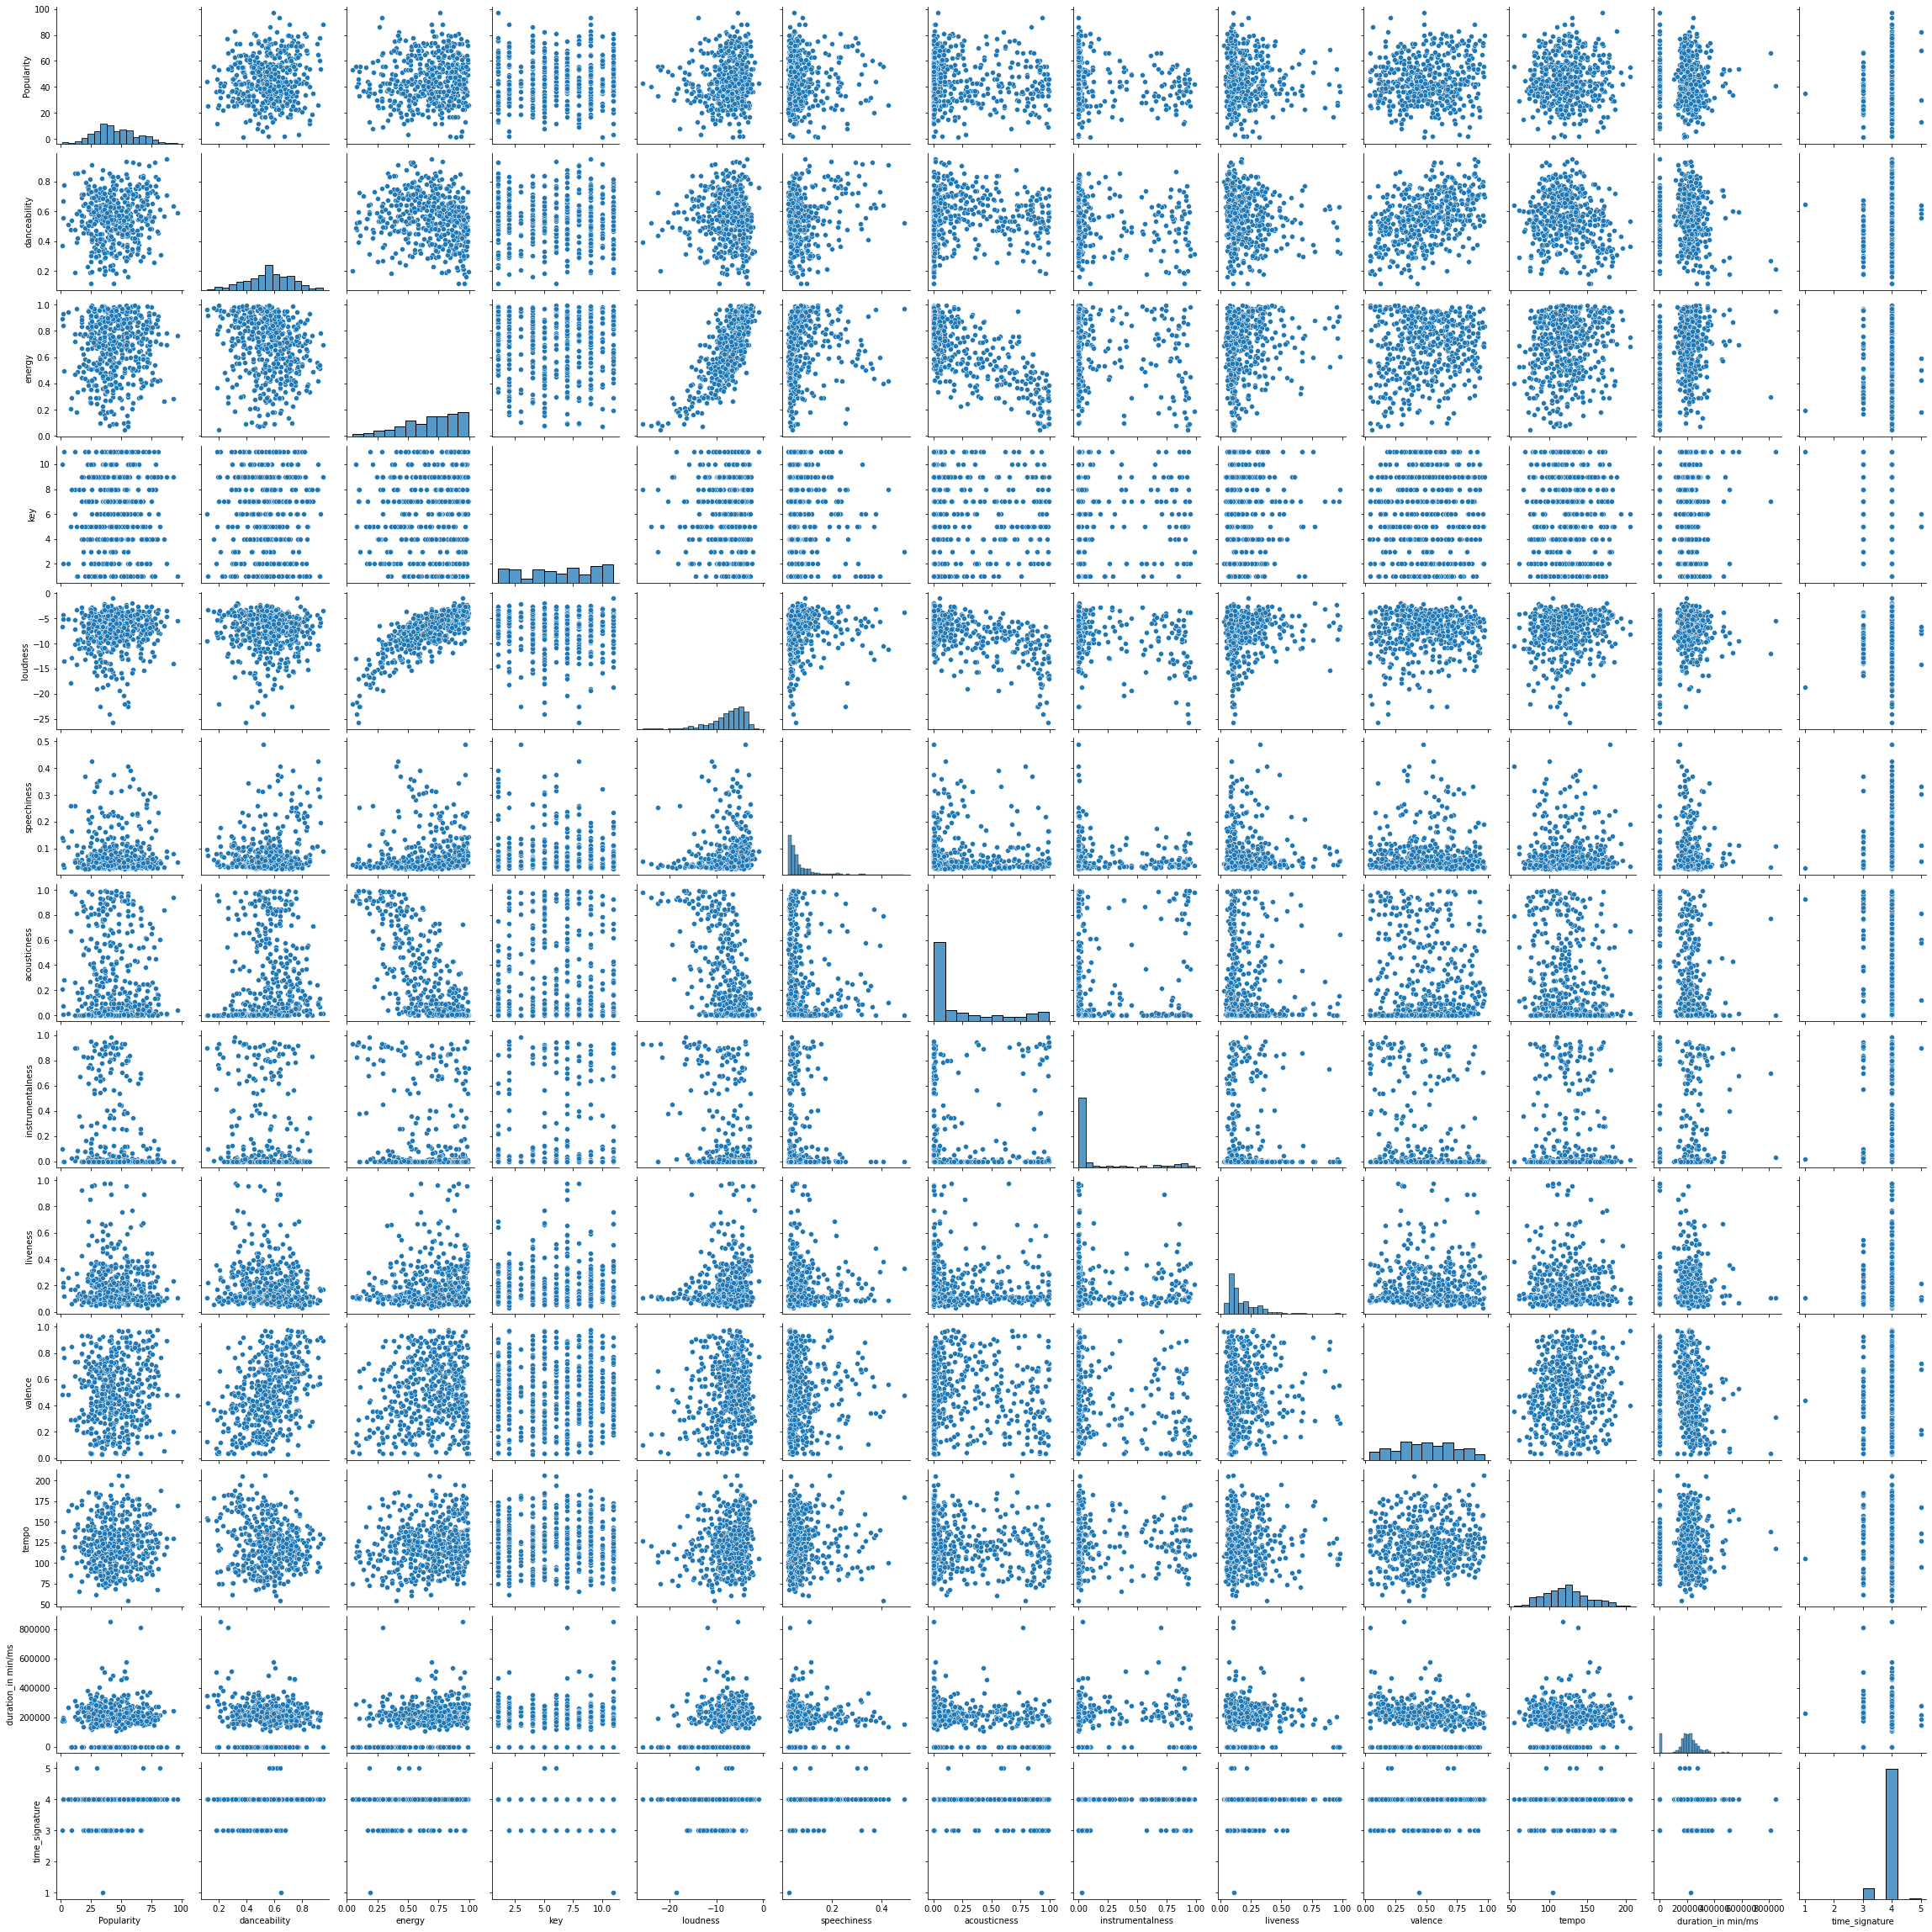

In [8]:
np.random.seed(42)
random_data = data.drop(columns = ['Class', 'mode'])
random_subset = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
sns.pairplot(random_data.iloc[random_subset], diag_kind='hist')

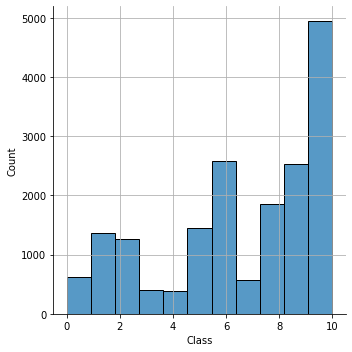

In [9]:
sns.displot(data['Class'], bins=11)
plt.grid()

Классы закодированы следующим образом:
- 0 - Acoustic/Folk
- 1 - Alt_Music
- 2 - Blues
- 3 - Bollywood
- 4 - Country
- 5 - HipHop
- 6 - Indie
- 7 - Instrumental
- 8 - Metal
- 9 - Pop
- 10 - Rock

Видно, что класс 10 (Rock) имеет значительное численное превосходство по сравнению с остальными классами. О и классы 0-9 несбалансированы между собой. 

### Обработка пропущенных значений

In [10]:
na_data = data.isna().sum()
na_data

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [11]:
na_data.sum()

6819

Заполним пропущенные значения медианами

In [12]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

### Матрица корреляций

In [13]:
corr_mat = data.corr()
corr_mat

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Popularity,1.000000,0.165469,0.050873,0.005505,0.122428,0.016321,0.031329,-0.123594,-0.170386,-0.071643,0.054171,-0.005924,-0.029972,0.066235,0.158493
danceability,0.165469,1.000000,-0.093838,0.006290,0.059723,-0.067135,0.199042,0.009055,-0.219255,-0.109485,0.444548,-0.183527,-0.121624,0.137455,-0.097681
energy,0.050873,-0.093838,1.000000,0.014780,0.767869,-0.035880,0.125427,-0.745963,-0.151817,0.195634,0.222998,0.210224,0.245768,0.145281,0.217328
key,0.005505,0.006290,0.014780,1.000000,0.002397,-0.106508,0.001513,-0.008485,0.003637,0.014141,0.029965,0.013156,0.013599,0.006441,-0.007365
loudness,0.122428,0.059723,0.767869,0.002397,1.000000,-0.033650,0.096027,-0.612824,-0.348796,0.112022,0.181086,0.164272,0.172010,0.127775,0.177872
mode,0.016321,-0.067135,-0.035880,-0.106508,-0.033650,1.000000,-0.074609,0.024035,-0.016565,-0.001563,-0.002986,0.021211,-0.069307,-0.019989,-0.044740
speechiness,0.031329,0.199042,0.125427,0.001513,0.096027,-0.074609,1.000000,-0.086648,-0.100555,0.070406,0.053885,0.048948,0.005044,0.056237,-0.059349
acousticness,-0.123594,0.009055,-0.745963,-0.008485,-0.612824,0.024035,-0.086648,1.000000,0.146809,-0.111393,-0.122547,-0.168318,-0.322583,-0.133936,-0.237138
instrumentalness,-0.170386,-0.219255,-0.151817,0.003637,-0.348796,-0.016565,-0.100555,0.146809,1.000000,-0.041411,-0.223621,-0.028771,0.036411,-0.072357,-0.038072
liveness,-0.071643,-0.109485,0.195634,0.014141,0.112022,-0.001563,0.070406,-0.111393,-0.041411,1.000000,0.021076,0.033515,0.053885,0.021546,0.045309


<AxesSubplot:>

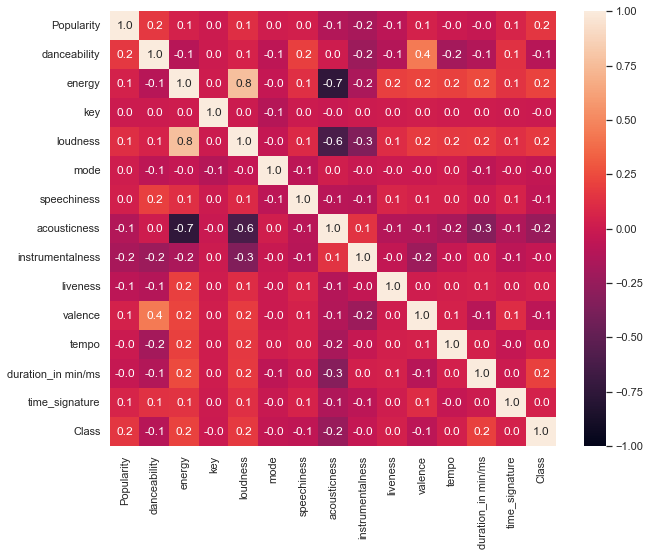

In [77]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(corr_mat, annot=True, fmt='0.1f', vmin=-1, vmax=1)

In [15]:
corr_mat > 0.9

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Popularity,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
danceability,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
energy,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
key,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
loudness,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
mode,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
speechiness,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
acousticness,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
instrumentalness,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
liveness,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


## 3. Обработка категориальных признаков

In [16]:
cat_cols = [col for col in data.columns if data[col].dtype.name == "object" and col != 'Class']
cat_cols

['Artist Name', 'Track Name']

In [17]:
from sklearn import preprocessing
for col_name in cat_cols:
    data[col_name] = preprocessing.LabelEncoder().fit_transform(data[col_name])
data

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1182,11406,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.003910,0.0849,0.8990,134.071,234596.0,4,5
1,1092,4988,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,7899,8144,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,1987,6753,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.003910,0.1220,0.5690,107.033,173968.0,4,5
4,6283,8167,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,3042,3796,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,5122,476,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,7032,8769,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,797,9743,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


Используем labelEncoder так как уникальных значений у этих признаков слишком много

## 4. Стандартизация

In [18]:
data_stand = data.drop(columns = ['Class'])
data_stand = data_stand.astype('float64')
data_stand.describe()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000
mean,4580.629584,7456.123305,44.499944,0.543433,0.662777,5.957768,-7.910660,0.636753,0.079707,0.247082,0.135326,0.196170,0.486208,122.623294,2.007445e+05,3.924039
std,2651.222266,4331.781471,17.218613,0.166268,0.235373,3.012689,4.049151,0.480949,0.083576,0.310632,0.274791,0.159212,0.240195,29.571527,1.119891e+05,0.361618
min,0.000000,0.000000,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000
25%,2279.000000,3695.000000,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.004300,0.000294,0.097500,0.297000,99.620750,1.663370e+05,4.000000
50%,4584.000000,7428.500000,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000
75%,6925.000000,11168.250000,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.056600,0.258000,0.672000,141.969250,2.524900e+05,4.000000
max,9148.000000,15128.000000,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


Видим, что разброс очень большой. Применим стандартизацию

In [19]:
data_stand = (data_stand - data_stand.mean(axis = 0)) / data_stand.std(axis = 0)
data_stand.describe()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04
mean,-5.349997e-17,1.302951e-17,-5.113096e-17,-4.935421e-16,1.883357e-16,1.198320e-16,2.037342e-16,-5.725089e-17,-8.844275e-17,-4.422137e-17,-1.539851e-17,7.896674e-17,-1.437195e-16,-1.054206e-16,-3.652212e-17,6.968815e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.727743e+00,-1.721260e+00,-2.526333e+00,-2.909952e+00,-2.815766e+00,-1.645629e+00,-7.913101e+00,-1.323951e+00,-6.844902e-01,-7.954154e-01,-4.924651e-01,-1.157389e+00,-1.948034e+00,-3.113343e+00,-1.792531e+00,-8.085991e+00
25%,-8.681391e-01,-8.682625e-01,-6.678787e-01,-6.702005e-01,-6.533311e-01,-6.498409e-01,-4.018967e-01,-1.323951e+00,-5.373189e-01,-7.815727e-01,-4.913988e-01,-6.197404e-01,-7.877278e-01,-7.778612e-01,-3.072393e-01,2.100597e-01
50%,1.271269e-03,-6.376893e-03,-2.903512e-02,9.423202e-03,1.581456e-01,1.401791e-02,2.209500e-01,7.552728e-01,-3.865580e-01,-5.333692e-01,-4.782398e-01,-4.218906e-01,-2.168440e-02,-8.649516e-02,7.514606e-02,2.100597e-01
75%,8.842602e-01,8.569515e-01,6.678851e-01,6.950613e-01,8.379166e-01,6.778767e-01,6.721557e-01,7.552728e-01,3.940128e-02,6.017351e-01,-2.864943e-01,3.883515e-01,7.735020e-01,6.542089e-01,4.620586e-01,2.100597e-01
max,1.722741e+00,1.771067e+00,3.223259e+00,2.679803e+00,1.432716e+00,1.673665e+00,2.288297e+00,7.552728e-01,1.047301e+01,2.410949e+00,3.132099e+00,5.048814e+00,2.080772e+00,3.205540e+00,1.139791e+01,2.975410e+00


## 5. Разбитие выборки

In [20]:
X = data_stand
y = data['Class']

X = X.to_numpy()
y = np.array(y, dtype = 'int')

X.shape, y.shape

((17996, 16), (17996,))

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(13497, 4499)

## 6. KNN
Для начала возьмем число соседей равное 4

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 4)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#### Ошибка на тестовой выборке

In [23]:
y_test_predict  = knn_model.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.5772393865303401

#### Ошибка на тренировочной выборке

In [24]:
y_train_predict = knn_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train

0.3783062902867304

In [25]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.58      0.73      0.64       172
           1       0.10      0.13      0.11       340
           2       0.39      0.41      0.40       340
           3       0.71      0.54      0.61       104
           4       0.49      0.52      0.51        84
           5       0.61      0.61      0.61       340
           6       0.25      0.19      0.21       626
           7       0.88      0.90      0.89       134
           8       0.46      0.50      0.48       473
           9       0.50      0.42      0.46       663
          10       0.42      0.43      0.43      1223

    accuracy                           0.42      4499
   macro avg       0.49      0.49      0.49      4499
weighted avg       0.43      0.42      0.42      4499



### 8 соседей

In [26]:
knn_model = KNeighborsClassifier(n_neighbors = 8)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

#### Ошибка на тестовой выборке

In [27]:
y_test_predict  = knn_model.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.5365636808179596

#### Ошибка на тренировочной выборке

In [28]:
y_train_predict = knn_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train

0.42239016077646885

In [29]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       172
           1       0.11      0.08      0.09       340
           2       0.44      0.40      0.42       340
           3       0.72      0.50      0.59       104
           4       0.45      0.58      0.51        84
           5       0.63      0.64      0.64       340
           6       0.27      0.21      0.23       626
           7       0.87      0.92      0.89       134
           8       0.50      0.55      0.52       473
           9       0.50      0.47      0.49       663
          10       0.45      0.54      0.49      1223

    accuracy                           0.46      4499
   macro avg       0.51      0.51      0.50      4499
weighted avg       0.45      0.46      0.45      4499



### 60 соседей

In [30]:
knn_model = KNeighborsClassifier(n_neighbors = 60)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=60)

#### Ошибка на тестовой выборке

In [31]:
y_test_predict  = knn_model.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.5090020004445432

#### Ошибка на тренировочной выборке

In [32]:
y_train_predict = knn_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train

0.490405275246351

In [33]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       172
           1       0.29      0.01      0.01       340
           2       0.54      0.31      0.39       340
           3       0.88      0.43      0.58       104
           4       0.49      0.57      0.53        84
           5       0.67      0.61      0.64       340
           6       0.42      0.21      0.28       626
           7       0.77      0.90      0.83       134
           8       0.56      0.40      0.46       473
           9       0.50      0.46      0.47       663
          10       0.42      0.76      0.54      1223

    accuracy                           0.49      4499
   macro avg       0.56      0.49      0.49      4499
weighted avg       0.49      0.49      0.46      4499



## Random Forest

In [34]:
from sklearn import ensemble
rf_model = ensemble.RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

#### Ошибка на тестовой выборке

In [35]:
y_test_predict  = rf_model.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.47699488775283394

#### Ошибка на тренировочной выборке

In [36]:
y_train_predict = rf_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train

0.07483144402459806

In [37]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       172
           1       0.05      0.02      0.03       340
           2       0.58      0.49      0.53       340
           3       0.85      0.69      0.76       104
           4       0.63      0.70      0.67        84
           5       0.72      0.69      0.71       340
           6       0.33      0.30      0.31       626
           7       0.92      0.93      0.92       134
           8       0.61      0.53      0.57       473
           9       0.58      0.56      0.57       663
          10       0.46      0.60      0.52      1223

    accuracy                           0.52      4499
   macro avg       0.59      0.58      0.58      4499
weighted avg       0.51      0.52      0.51      4499



## Gradient Boosting

In [38]:
gb_model = ensemble.GradientBoostingClassifier(n_estimators = 100)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

#### Ошибка на тестовой выборке

In [39]:
y_test_predict  = gb_model.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.4329851078017337

#### Ошибка на тренировочной выборке

In [40]:
y_train_predict = gb_model.predict(X_train)
err_train = np.mean(y_train != y_train_predict)
err_train

0.3565977624657331

In [41]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       172
           1       0.13      0.01      0.02       340
           2       0.56      0.52      0.54       340
           3       0.80      0.69      0.74       104
           4       0.65      0.74      0.69        84
           5       0.71      0.72      0.71       340
           6       0.45      0.35      0.39       626
           7       0.91      0.95      0.93       134
           8       0.63      0.59      0.61       473
           9       0.61      0.57      0.59       663
          10       0.49      0.69      0.57      1223

    accuracy                           0.57      4499
   macro avg       0.61      0.60      0.60      4499
weighted avg       0.54      0.57      0.54      4499



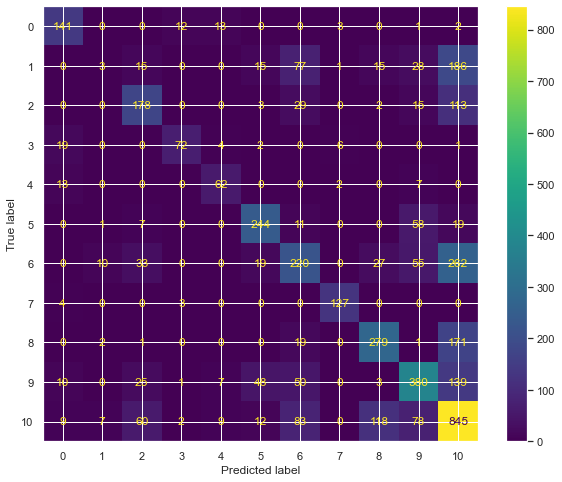

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict) 

Меньше всего ошибка получается при использовании Gradient Boosting, однако она все равно достаточно большая. Можно попробовать улучшить результат, поборовшись с несбалансированностью классов. Видно, что модель часто выбирает именно самый большой 10 класс. Также результат может улучшиться, если попробовать по-другому обработать текстовые признаки

# ДЗ2

# 1 скрытый слой

In [43]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (80,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42,
                          tol = 0.001,
                          verbose=True)

In [44]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 2.14278651
Iteration 2, loss = 1.91820693
Iteration 3, loss = 1.78438716
Iteration 4, loss = 1.67619664
Iteration 5, loss = 1.59831742
Iteration 6, loss = 1.54083294
Iteration 7, loss = 1.49676844
Iteration 8, loss = 1.46232254
Iteration 9, loss = 1.43563676
Iteration 10, loss = 1.41441704
Iteration 11, loss = 1.39819615
Iteration 12, loss = 1.38500951
Iteration 13, loss = 1.37388152
Iteration 14, loss = 1.36594597
Iteration 15, loss = 1.35829898
Iteration 16, loss = 1.35173795
Iteration 17, loss = 1.34670915
Iteration 18, loss = 1.34274207
Iteration 19, loss = 1.33826402
Iteration 20, loss = 1.33507581
Iteration 21, loss = 1.33176132
Iteration 22, loss = 1.32842501
Iteration 23, loss = 1.32550427
Iteration 24, loss = 1.32404402
Iteration 25, loss = 1.32167895
Iteration 26, loss = 1.31965072
Iteration 27, loss = 1.31666518
Iteration 28, loss = 1.31584523
Iteration 29, loss = 1.31332531
Iteration 30, loss = 1.31204770
Iteration 31, loss = 1.31037646
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(80,), random_state=42,
              tol=0.001, verbose=True)

In [45]:
from sklearn.metrics import accuracy_score

### Проверяем качество

In [46]:
y_test_predict  = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test = np.mean(y_test != y_test_predict)
err_train = np.mean(y_train != y_train_predict)
print("Test set error: {}".format(err_test))
print("Training set error: {}".format(err_train))

Test set error: 0.46099133140697934
Training set error: 0.4418759724383196


In [47]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       172
           1       0.00      0.00      0.00       340
           2       0.54      0.51      0.52       340
           3       0.78      0.68      0.73       104
           4       0.51      0.70      0.59        84
           5       0.66      0.68      0.67       340
           6       0.41      0.29      0.34       626
           7       0.87      0.95      0.91       134
           8       0.60      0.56      0.58       473
           9       0.54      0.57      0.56       663
          10       0.47      0.67      0.56      1223

    accuracy                           0.54      4499
   macro avg       0.56      0.57      0.56      4499
weighted avg       0.50      0.54      0.51      4499



## 2 скрытых слоя

In [48]:
mlp_model = MLPClassifier(hidden_layer_sizes = (80, 40),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42,
                          tol = 0.001,
                          verbose=1)

In [49]:
%%time
mlp_model.fit(X_train, y_train)

Iteration 1, loss = 2.15702247
Iteration 2, loss = 2.06823104
Iteration 3, loss = 1.97263066
Iteration 4, loss = 1.83561212
Iteration 5, loss = 1.71889468
Iteration 6, loss = 1.63554645
Iteration 7, loss = 1.57596063
Iteration 8, loss = 1.53047506
Iteration 9, loss = 1.49317946
Iteration 10, loss = 1.46338525
Iteration 11, loss = 1.44045382
Iteration 12, loss = 1.42138164
Iteration 13, loss = 1.40705400
Iteration 14, loss = 1.39515809
Iteration 15, loss = 1.38468056
Iteration 16, loss = 1.37621756
Iteration 17, loss = 1.36742814
Iteration 18, loss = 1.36083140
Iteration 19, loss = 1.35379111
Iteration 20, loss = 1.34733945
Iteration 21, loss = 1.34174595
Iteration 22, loss = 1.33609803
Iteration 23, loss = 1.33049997
Iteration 24, loss = 1.32621691
Iteration 25, loss = 1.32176208
Iteration 26, loss = 1.31767679
Iteration 27, loss = 1.31270191
Iteration 28, loss = 1.30962946
Iteration 29, loss = 1.30592019
Iteration 30, loss = 1.30345173
Iteration 31, loss = 1.30071208
Iteration 32, los

/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=(80, 40),
              random_state=42, tol=0.001, verbose=1)

### Проверяем качество

In [50]:
y_test_predict  = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test = np.mean(y_test != y_test_predict)
err_train = np.mean(y_train != y_train_predict)
print("Test set error: {}".format(err_test))
print("Training set error: {}".format(err_train))

Test set error: 0.46543676372527226
Training set error: 0.42861376602207896


In [51]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       172
           1       0.00      0.00      0.00       340
           2       0.53      0.49      0.51       340
           3       0.83      0.57      0.67       104
           4       0.51      0.64      0.57        84
           5       0.68      0.67      0.67       340
           6       0.39      0.30      0.34       626
           7       0.89      0.93      0.91       134
           8       0.60      0.57      0.58       473
           9       0.53      0.61      0.57       663
          10       0.47      0.64      0.55      1223

    accuracy                           0.53      4499
   macro avg       0.56      0.56      0.55      4499
weighted avg       0.50      0.53      0.51      4499



/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Подбор параметра alpha

In [52]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (80,), 
                              solver = 'adam', activation = 'logistic', max_iter=1000, random_state = 42, tol=0.001)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

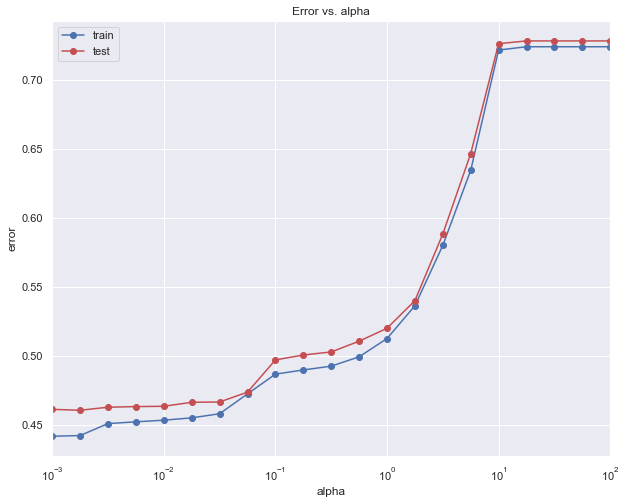

In [53]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

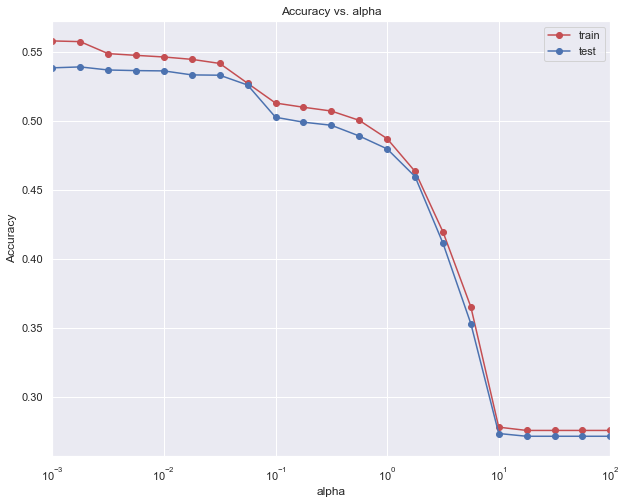

In [54]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

### Минимальная ошибка

In [55]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Minimum training set error: {}".format(min_train_err))
print("Minimum test set error: {}".format(min_test_err))

Minimum training set error: 0.4419500629769578
Minimum test set error: 0.4607690597910647


In [56]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print("Optimal alpha: {}".format(alpha_opt))

Optimal alpha: 0.0017782794100389228


## Подбор числа нейронов

In [67]:
neuron_arr = [num for num in range(5, 200, 5)]
test_err = []
train_err = []
train_acc = []
test_acc = []

for num in neuron_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (num,), 
                              solver = 'adam', activation = 'logistic', max_iter=1000, random_state = 42, tol=0.001)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

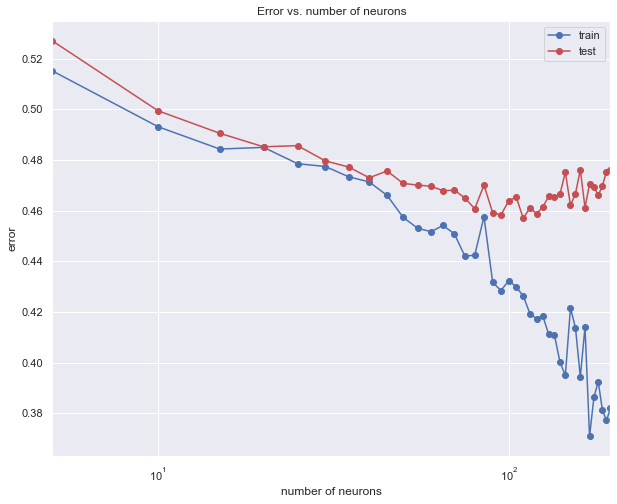

In [68]:
plt.semilogx(neuron_arr, train_err, 'b-o', label = 'train')
plt.semilogx(neuron_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Error vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('error')
plt.legend()

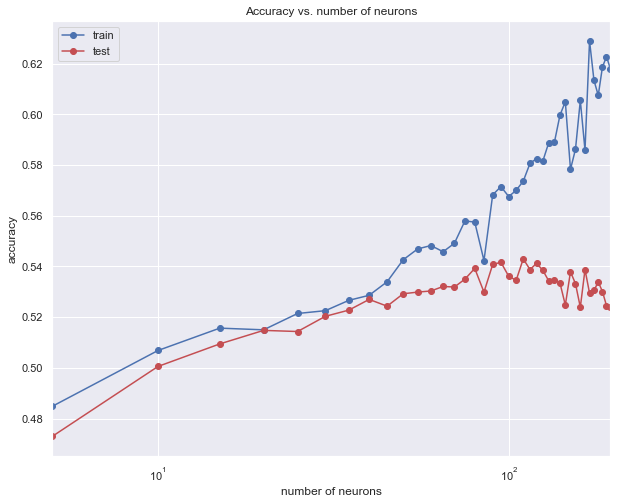

In [69]:
plt.semilogx(neuron_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(neuron_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.title('Accuracy vs. number of neurons')
plt.xlabel('number of neurons')
plt.ylabel('accuracy')
plt.legend()

На графиках видно, что в какой-то момент ошибка на тестовой выборке практически не уменьшается, однако на тренировочной выборке она продолжает уменьшаться

## Минимальная ошибка

In [70]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Minimum training set error: {}".format(min_train_err))
print("Minimum test set error: {}".format(min_test_err))

Minimum training set error: 0.370971326961547
Minimum test set error: 0.45699044232051567


In [71]:
ind = test_err.index(min_test_err)
num_opt = neuron_arr[ind]
print("Optimal number of neurons: {}".format(num_opt))

Optimal number of neurons: 110


## Обучение сети с оптимальными параметрами

In [72]:
mlp_model = MLPClassifier(alpha = alpha_opt,
                          hidden_layer_sizes = (num_opt,),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 42,
                          tol = 0.001
                          )

In [73]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: user 43.9 s, sys: 565 ms, total: 44.4 s
Wall time: 11.4 s


/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', alpha=0.0017782794100389228,
              hidden_layer_sizes=(110,), random_state=42, tol=0.001)

In [74]:
y_test_predict  = mlp_model.predict(X_test)
y_train_predict = mlp_model.predict(X_train)
err_test = np.mean(y_test != y_test_predict)
err_train = np.mean(y_train != y_train_predict)
print("Test set error: {}".format(err_test))
print("Training set error: {}".format(err_train))

Test set error: 0.461213603022894
Training set error: 0.430688301103949


In [75]:
print(sklearn.metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       172
           1       0.22      0.01      0.01       340
           2       0.52      0.54      0.53       340
           3       0.76      0.68      0.72       104
           4       0.52      0.67      0.59        84
           5       0.64      0.68      0.66       340
           6       0.41      0.30      0.35       626
           7       0.88      0.94      0.91       134
           8       0.60      0.57      0.58       473
           9       0.57      0.53      0.55       663
          10       0.47      0.67      0.56      1223

    accuracy                           0.54      4499
   macro avg       0.58      0.57      0.56      4499
weighted avg       0.52      0.54      0.51      4499



## Матрица рассогласования

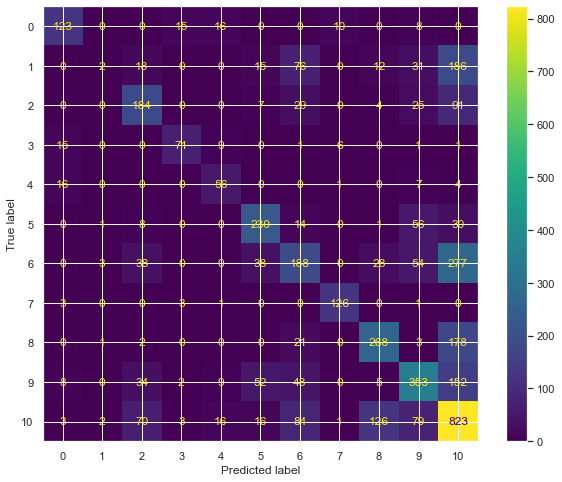

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict) 